# Notebook to show Comments Summaries

In [2]:
# Change working directory to be project root
import os
#os.chdir("..")
os.getcwd()

'C:\\Users\\payla\\Documents\\MDS\\Capstone\\DSCI_591_capstone-BCStats'

In [14]:
# ensure packages reload after every change 
%load_ext autoreload
%autoreload 2


import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import string
import networkx as nx

import src

from src.data.preprocessing_text import clean_text
from src.data.preprocessing_text import replace_typical_misspell
from src.data.preprocessing_text import remove_stopwords
from src.text_summary import *

from sklearn.metrics.pairwise import cosine_similarity

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# read in data about subthemes
df = pd.read_csv(".\data\interim\joined_qual_quant.csv")
df.head(3)

,USERID,code,qual_value,quan_value,question,diff,text
0,175125-215928,43,-1,-1,Q63,0,The problem with the BCSS is Linda Cavanaugh a...
1,175125-215928,43,-1,-1,Q65,0,The problem with the BCSS is Linda Cavanaugh a...
2,191202-862188,102,-1,-1,Q39,0,"Improved office space (fix HVAC, etc) but NO LWS"


In [5]:
# filter to a specific subtheme and diff
df_43_0 = df[(df['code'] == 43) & (df['diff'] == 0)]
df_43_2 = df[(df['code'] == 43) & (df['diff'] == 2)]

In [6]:
# drop any duplicate text values
df_43_0 = df_43_0.drop_duplicates(subset=['text'])
df_43_2 = df_43_2.drop_duplicates(subset=['text'])
df_all = df.drop_duplicates(subset=['text'])

In [19]:
corpus_43_0 = src.text_summary.comment_to_corpus(df_43_0, 'text')
corpus_43_2 = src.text_summary.comment_to_corpus(df_43_2, 'text')
corpus_all = src.text_summary.comment_to_corpus(df_all, 'text')

In [23]:
corpus_43_0 = src.text_summary.corpus_prep_sentences(corpus_43_0)
corpus_43_2 = src.text_summary.corpus_prep_sentences(corpus_43_2)
corpus_all = src.text_summary.corpus_prep_sentences(corpus_all)

In [91]:
# tokenize into sentences 
sentences_43_0 = nltk.sent_tokenize(corpus_43_0)
sentences_43_2 = nltk.sent_tokenize(corpus_43_2)
sentences_all = nltk.sent_tokenize(corpus_all)

## Word and Sentence EDA for Subtheme 43 Agreement None
<br>

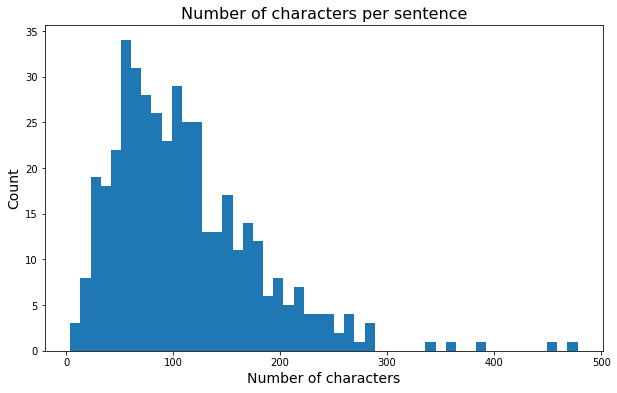

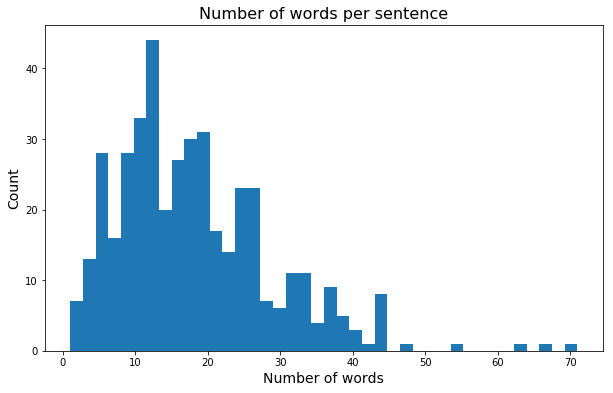

,stats,character values,word values
0,min,4.00,1.00
1,max,478.00,71.00
2,mean,110.73,18.16
3,median,98.50,16.00


In [90]:
src.text_summary.sentence_eda(sentences_43_2, word_plot=True, character_plot=True)

## Word and Sentence EDA for All Comments

<br>

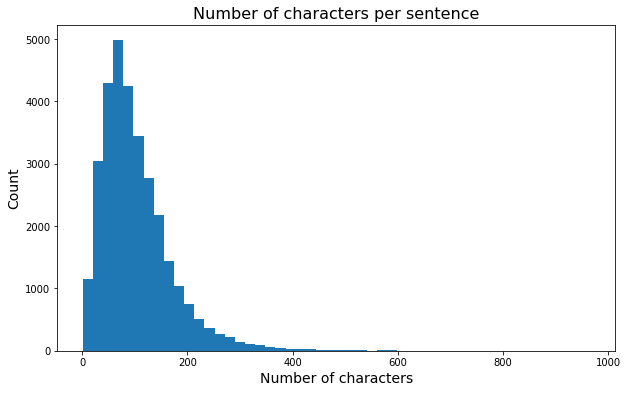

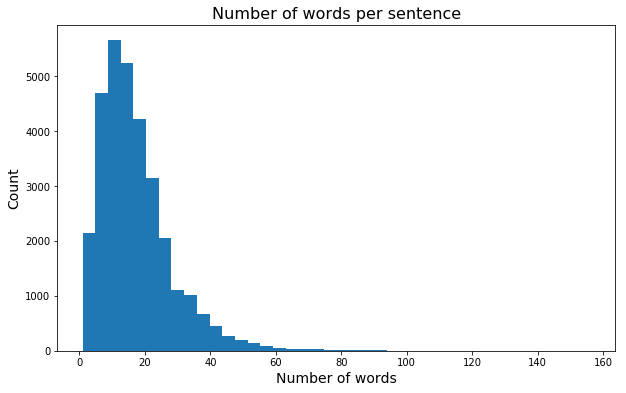

,stats,character values,word values
0,min,1.00,1.00
1,max,965.00,156.00
2,mean,102.25,17.16
3,median,88.00,15.00


In [96]:
src.text_summary.sentence_eda(sentences_all, word_plot=True, character_plot=True)

## Pre-processing
<br>

In [100]:
processed_43_0 = src.text_summary.pre_processing(sentences_43_0)
processed_43_2 = src.text_summary.pre_processing(sentences_43_2)
processed_all = src.text_summary.pre_processing(sentences_all)

In [103]:
count = 0
for i in processed_all:
    print(count)
    print(i, "\n")
    count += 1

problem bcss linda cavanaugh csb 

sheriffs minimized trivialized 

adm zero law enforcement experience 

sickening treated lumped civilian employees 

sheriffs removed csb nothing change 

bcss management ability make changes adm civilian agenda 

government listen us csb killing us 

adm years denied staffing wage issues patently untrue 

jibc say hire instructors 

jibc gov entity say panels appointing pto 

jibc essentially secret society 

play game get teach improved office space fix hvac etc lws administration people better opportunities apply non administrative positions based experience capabilities merit 

would appreciate better variety courses admin access gov epdp 

lowest paid canada workloads increases volume complexity cases 

combined increased difficulties around hiring retention organization need invest employees people moving outside public service sector 

official acknowledgement limited diversity supervisory positions emergency management fields bc public sector 

ergonomics plays big role office 

big support 

columns hinder ability see public counter 

sometimes use antiquated equipment old stamps work efficiently etc due budget restraints 

money 

would like see opportunity short term work groups branch possibly month terms 

would make us know client work better provide new challenges ability participate clien twork 

better supervision training supervisors 

informed supervisor disrespectful discuss policy office procedures unless done one one office 

say anything part try find negative first even intended 

government needs provide proper computer office equipment photocopiers crown offices people offices carry duties 

includes sufficient scanners comply electronic file requirements lack serious impediment 

government provide equipment thereby incurring labour costs lower productivity detriment people serve 

penny wise pound foolish 

private sector law firms sometimes experience make mistake never seen level indifference day day nee


also highlight cancelled dates red instead using small tick box end renewed workplace station standing desk sitting long periods time negative health effect 

better equipment systems often making difficult complete urgent tasks hand 

staff extremely busy office always gun many tasks accomplished urgent matter 

hard leave desk take breaks want get work done 

feel paid enough job 

go day long working sensitive issues 

replacement staff happen soon enough staffing changes 

go long time cover absences still demanding workload deal technology available computers printers negatively impacts ability job well 

computer extremely slow 

printing problematic eg slow open print documents impossible quickly select batch documents printing often send documents print show printer screen meaning repeat trips printer 

improvements areas would greatly increase efficiency 

addition support staff needed efficiency eg one legal assistant three lawyers would reasonable balance 

making sure peop

exposed mental health subjects fentanyl communicable diseases assaults person daily basis paid k year entry level police officers get less k would helpful functioning computers 

amount time energy wasted fixing far exceeds cost replacement 

computer powerful enough run applications required position 

would like see priority upgrading office spaces equipment without needing miles red tape order desk chair example 

clients enter government office need repair look favourably government whole 

updated carpets paint furniture would make significant difference image professionalism offices 

would love see recycling options available workplace plastics containers 

ensure cultural safety indigenous staff 

little accountability performing employees undermines morale productivity 

majority co workers hard working competent 

however apparent consequences co workers fail perform 

would like see focus self directed work teams 

allow team control factors impact quality quantity service l

would help retain people keep happier 

providing resources required physical equipment effectively job 

court room work stations court clerks built computers used poor regards ergonomics 

believe lead injuries court clerk staff including issues like carpal tunnel syndrome 

air quality cleanliness main continues poor 

improving air quality cleanliness ergonomics would go long way employees 

physical work environment could improved 

leaking windows puddles water desk rains etc support professional development opportunities 

support position 

nature work seems changing however training position 

opportunities including related training employees grow leadership positions 

needs better distribution workload 

work handle days weeks 

also need ensure employees recognized hard work extras part job 

rarely recognized contribution times go beyond 

involved voice heard registry decisions rather merely told decided required would go long way office communication appreciation 

impr

lot opportunities require long investment time order people move however lot people get demotivated position goes someone merits get position 

personally tailored approach personal skill development discussion staff members areas need work provision assistance specific area short term 

work respectful environments communication within ministry better procedure manuals consistency within ministry procedure tasks outcomes better work station set ups better chairs phones headsets available employees etc flex days would welcome perk 

day weekend every rd th week feel would help moral employees 

strongly feel registry staff could benefit semi regular training procedure check ins ensure staff page regarding work processes 

ensuring employees access natural light eg employees inside offices consider making co working communal working space available area natural light less volume work challenging work provided new computers 

waste much time dealing laptop rarely works properly life woul


transparency accountability human resource management 

equal opportunity employees 

moved anew ministry integration gone well 

feel dm made effort understand work long established culture 

seems act barrier getting things done timely way 

extreme lack communication 

supervisors need available staff questions concerns 

office doors always closed 

calendars indicate supervisors unavailable meetings days 

hr decisions always open 

stress workload enhancing electronic tools building trust executive maintaining work life balance coordinating priorities staff resources respect 

executive rarely articulates long term objectives organization focusing instead short term mandates 

hampers development trust employees suspect senior executive understand context work ability spot seize opportunities staff junior managers confident ideas recognized accepted resourced latest mandate letter 

greater communication executive person electronically 

clearer processes 

increase ftes address

allow meaningful input staff planning implementation ogd move new workspace working arrangements leading workplace strategies lws 

update hardware software better information work systems support work 

bringing new systems business processes make work better efficient 

recent business process decisions fcbc front end application receipt consequential things result made work less satisfying staff less efficient clients staff provide reduced quality service clients 

recent systems initiatives tediously slow generated gains supposed complex cumbersome previous systems 

provide computer systems appropriate work done negatively impact productivity 

access date tools 

software money furniture order provide appropriate ergonomic workstations employees computing environment leaves lot desired 

given lease rate computers etc ibm definitely making killing charges computer services taxpayers expense 

time system changed 

said every wes visible results 

improvements aging building inclu

growth change sight 

refresh laptop already four years old slow 

measures place support learning environment 

trusted professional excel bureaucratic structure 

need balance trust process decision making areas expertise parameters would assuage micro management 

create culture service groups also front facing line sight outcomes mutual interdependencies collaborative organization 

expanded leadership program develop interested gaining leadership positions assist succession planning 

personal interaction staff outside head office 

field visits make sure forgotten special events celebrations strong consistent leadership 

ed adm last years 

consistency person comes different ideas wanting change process priorities etc seems though nothing ever completed decisions made 

staff constantly prove value time change executive extremely draining 

space becoming crowded squeeze new resources 

need room quiet work 

access windows daylight would also big improvement would lift moods ma

reason ha staff cant work home 

yr employee loved career compartmentalized challenge satisfaction sense achievement feel completely stagnant 

significant wage increase way overdue would like job week see difficult understand suggestions made well listen take suggestions consideration limit cronyism field managers would great face face meetings 

realize budget limits 

think value classifications 

include classifications changes processes affect 

sop changes example poc impacted include admin vice versa technology needs catch mobile workers 

lync connectivity causes challenges working remotely would like see organization support encourage staff rather micromanage point harassment 

causing good competent staff quit 

time top attitude staff work preforming need monitored every minute every day 

true waste government dollars 

feel ministry become driven computer system rather focus serving clients 

feel forced pretend nothing wrong system impacts clients 

transparency executive


stressful demanding performance measures 

quite frankly seems many managers enough people working ground unit 

average wage canada hour 

education experience paid appreciably 

meaningful authentic recognition building social culture work 

though may difficult division staff engage interpersonal relationships still important aspect work something severely lacking current organization 

recognition social events exist feel forced best genuine employee appreciation beyond seasonal thank emails job well done 

additionally equally important feel social culture organization 

possibly staff focused heads work make efforts build social culture workplace opportunities team building division 

interactive work functions executives visible breaking silos work merging groups 

work distributed evenly fairly among staff special arrangements made favoured employees 

favouritism pets receive special privileges supervisors turn blind eye bullies worth dealing pet repercussions worth suck 

st

poverty reduction 

consistency 

nickname ministry change used cover constantly change office processes 

changes managed professionally 

control temperature office 

generally hot 

value education instead work experience within ministry 

opportunity growth within ministry options training help one progress ministry 

correspondence communication executives 

better pay less deductions 

sad someone makes hour benefits actual full time hours makes equal money eaw identified make hour 

ability accepted work hours week hours paycheck 

ability opt benefits may value higher paycheck pension retirement significantly far away 

find ten six pm shift helpful healthy family life 

time home made dinner children eating going straight bed time week spend 

opportunities advancement modernized building 

feel compensation something could reviewed considering employees live metro vancouver fraser valley area cost living high compared lot regions software program use day sadly date meet needs

need technical skills 

need incentive people stay organization bonus continuity subject area 

increasing wages competitive salaries necessarily industry competitive inflation cost living 

succession planning needs better managed 

fill positions people retire get job shadowing required success 

authenticity make improvements myhr supports employees better providing timely services clearer communication 

consistent staffing practices throughout 

better leadership training upper middle management 

leadership values practices work everyone helps supports one another better computers monitors better productivity continued innovation development processes organization would like see emphasis put dealing correcting colleague colleague issues 

seems like well known issues workers causing staff move become unhappy issues even brought supervisors never seem taken seriously corrected actions improve 

negligence dealing management working style issues continues constantly high turnover 


seem focused process understandable someone floor would wonderful link long term goals job currently 

idea would long term model vision goals based personal assumptions communicated 

mission vision statements would nice understanding type hiring model working towards would awesome 

thank organization ensure work unit members act ethically eg explain meaning plagiarism bad attitudes dealt promoting individuals 

slap face others work hard care colleagues 

better tools technology hardware software regular pay increase time regular interval performance fair compensation work 

vacant positions filled rather reducing numbers attrition 

greater respect work life balance 

walk talk 

utilizing season experienced employees may older rather always turning favored would lead greater engagement successfully pass years experience 

careful recognition piece alienate others office 

always recognizing people ignoring quiet work others create toxic divided office 

move recruiters ministries 


knowledge transfer senior junior staffers communicate organization goals properly technical ideas generated ground hire staff knowledge transfer stop reorganizing departments ensure better public service place people call questions ie fix hire front counter bc administrative people keep competitive rate pay staff retention 

communication collaboration groups info hard posted would connect answer types questions 

person fairly new service yr seem ever encountering new people whose work related mine 

without common kitchen extroverted personality sure would happen 

imagine something like giant org chart bulletin boards interactive online highlight overlapping work 

dropdowns something indicate topics might go see staff 

type info put front faces something need seek 

difficult look something one idea exists 

much faster process revising legislation regulations specifically especially minor revisions 

new employee years experience 

also mom years old toddler 

weeks vacation lot

see entrance handsome boy sleeping rough years 

please let maintain front doors lights flank 

picking way front stairs dark half year 

please clean paint lobby elevators 

regularly 

repair paint stairwells 

quick affordable fixes 

thanks 

provide flexibility employees allow healthier balance work personal life 

bc public service needs take clear steps deal sexual harassment occurs 

harassed colleague later found documented history harassment within ministry 

proper steps taken past would deal distressing uncomfortable situation 

really disappointed employer 

communicate strategic relevant decisions increase transparency decision making process upgrade office furniture meet ergonomic standards 

standing desks office chairs w proper back support 

point time like bring office chair expense 

could one provided allow proper back support comfortable sitting work day resulting back pain 

every workstation sit stand adjustable desks default special accommodation necessary 

ed

see bad behaviour shrugged 

performance management individuals negatively impact work environment 

stronger central project management 

clear articulation proactive communication new processes impact unit level work planning organization new executive may election 

optimistic see change better 

previous administration absolutely terrible communicating employees goals direction 

training ground halt people communications experience hired political knew people 

organization rife incompetence managers asked performance manage non performer non performing employee manages take manager hr claiming bullied 

computer systems could really use upgrade often work properly 

far new executive seems improvement former 

less ageism young old less attitude less ego would great folks didnt look important things planet 

reality boat 

fewer shorter meetings leadership development regular staff meetings social activities 

innovation always pushed mantra high level risk aversion executive sup

better explanation changes policy direction management training persons interested pursuing management positions vs courses already managers 

slow rush one liners context better communication dmo exec levels streamline approval processes foi finance e approval minister assignments job classification reviews higher pay overworked staff work addition job description encourage staff healthy lifestyle exercise biking walking etc demonstrate communicate strategic understanding appropriate knowledge commitment advocacy subject matter know act matter ensure timeliness decisions support empower expertise provided subject matter experts ensure accountability transparency decisions made throughout hierarchy 

organization must focus equal opportunity employer 

give everyone chance advance favorites 

need real leaders great writers get promoted management good writers 

stop bullying harassment 

fully understand people come forward either live fear stress quit 

psa ill equipped support bully

work environment would drastically improved improving space floor 

eye pleasing space set functional engaging way 

improve training development resources 

set clearly understandable priorities make sure get done 

ministries challenging files 

flnrord calls work planning 

divisional branch plans easily understandable eg task specific vaguely defined adms accountable 

executive check progress throughout year fy end 

enables organization prioritize complete work 

everything priority progress much anything 

negatively limits reconciliation mandate 

continuously promise deliver 

complete myperformance required mtgs per cycle day due 

link myperformance cycle work planning cycle 

communication levels clear strategies flowing common vision delegation decisions proactively broadly sharing information would go long way harnessing creativity mirr staff 

would like floor others division 

would like see victoria based mirr employees working together one roof one floor 

clearer dir

even without added responsibilities expectations bc fallen behind drastically paying employees properly hence de valuing 

give us proper facilities resources jobs 

treat us valued professionals worthy respect autonomy flexibility rather script trained automatons de valued time regulated minute subject inflexible schedules rigid unsupportive management 

increase pay give us professional responsive environment earn 

sorely lacking 

reason staff stay bc corrections bc corrections care 

opportunity senior decision makers meet semi regularly staff throughout ministry 

opportunity well meeting staff broader social health education justice ministries 

particularly focus outside victoria huge problem keeping staff paid poorly work 

put harms way everyday get assaulted 

paid fairly 

believe leadership needs meet employees get input proposed changes opposed taking consideration needs inmates 

communication idea exchanges organizing scheduling needed 

computers office space required 

inmates run building control 

told leave trying discussion mngmnt acceptable 

staff safety needs improve 

cs mngmnt absolutely idea constantly making bad decisions 

good staff targeted harassed cs mngmnt 

frustrating toxic dangerous 

please help us 

safety pay attention personal safety staff 

physical work site notifications hv itinerate offices etc 

advocate us receive pay commensorate job description cost living province compared po earn provinces 

long got organization telling us good trying happy got 

need pay increase present rate insulting given high skill set possess unrealistic housing market live 

would like know report something manager dealt timely manner 

several occasions something reported staff member inmate communicated 

seek ask questions 

employees consulted changes directly affect job income 

rumours rampant organization mgmt refuses address 

often hear decisions affect us sources outside organization 

causes great deal stress among workforce feel v

even though hold fact favoritism continually happens things government fair without favoritism 

tired speaking nothing gets job many times without joy 

however best values hope change 

pay raise timeliness new equipment construction approved completed 

makes sense house across street built faster took install safety equipment office equipment still installed work even began one thing increase sense valuable employee 

bring call career job paycheque 

pay joke benefits average downright disgusting needs inmate vastly outweigh safety staff member 

feel valued 

come work try keep head maintain status quo collect meagre paycheque finally seeking secondary sources income stay afloat 

career life pictured 

staff safety grossly underpaid level danger workload 

moreover workload absurdly distributed debarments 

furthermore safety seems even concern rights inmates supersede staff safety 

exaggeration general feeling place work directors head office done nothing improve working condi


generally happy work 

one thing concern relatively low wages 

safety work spaces one small thing community corrections could strongly improve upon cleaning services 

everyday take time clean area common areas work contracted apparently bare minimum cleaning services 

unacceptable common areas public access filthy unsanitary 

people get sick year around doors washrooms carpet break rooms cleaned properly cleaners 

says employer value health well employees public access services 

pay pay structure feel regular staff meetings would beneficial promote better communication within department 

also clear job duties would give better sense responsible 

worked auxiliary employee year minus day 

year anniversary given permanent position began new probationary period 

means receive extended benefits another months months initial hire bc government 

wish could received extended benefits sooner 

higher pay 

much enjoy job work people work 

ever leave would pay commensurate comparabl

default taking action rather waiting information 

succession 

give good consideration positions done location 

best people jobs always central location 

managers able apply positions 

hire best person best job done 

office space adequate 

hold supervisors managers accountable supporting staff learning development career goals 

people decision making abilities executive need better understanding decisions impact day day operations staff 

improve identity showcase work publicly like cos 

provide leadership training mentoring middle management see follows 

communication levels directions 

better ability choose leadership much skill leaning towards improved clearer behavior identification 

eliminate desktop computers time refresh give everyone laptop separate independent widescreen monitor 

much work done spreadsheets maps large wide monitors would make sense 

accountability top bottowm improve vision ministry staff working towards improving forest sustainability protecting 

accountability integration 

many areas operate isolation often duplication competing objectives 

result accountability achieving organizational objectives gets superseded personal agendas 

auxiliary employees need job security seniority transferable within ministry improve options reducing noise workplace eg noise cancelling headphones laptops take calls lync meetings small meeting rooms small meeting rooms increased communication staff reducing noise office 

support capacity related work load 

better care people levels organization 

fire season many people burnt operating capacity back office 

allow people paid time fire deployments especially emergency situations 

nothing says care people like making use vacation leave without pay regular days back intense exhausting fire deployments 

spent hundreds millions fight fires budge days taken callous unfeeling decision authorize paid days contributed greater fatigue levels necessary 

case regular season seasons like 

executive c

constant members work group though province 

afraid bring forward mention abuse authority result would likely attack fabricated accusation 

think government offices need updated provide natural light employees 

working building never meant house people day everyday detrimental one mental health 

window office greatly increased mood ability complete work camaraderie staff 

willing share information work future honest succeed fail 

hvac system building feel poor 

often either hot cold gas smell occurs often 

ensure newest technology software hardware etc becomes immediately available employees 

seems like public service always lagging behind industry come using new technology 

allow promotions 

right get another job order promoted get job without already 

like job would like get higher designation based achievements however possible 

order retain employees ability promote would go long way 

current policy leads high staff turnover lack succession 

better communication reco


also 

extremely difficult social workers work full open concept offices even proper desks privacy stop giving lip service taking employees ideas experience consideration 

changes made effect field people know things operate field far removed know happens longer 

need executive government stand treasury board psa make decisions staff clients make things easier finance executive type positions 

opportunity better autonomy teleworking would like organization focus importance team cohesion respect relationships 

holding supervisors employees accountable disrespectful inappropriate behaviour 

disheartening hear colleague de valued supervisor 

colleague hearing many positive words work 

instead hearing wrong 

much disagree relatively recent decision longer allow therapy dogs office 

two therapy dogs regularly present office history complaints 

welcomed clients youth families well colleagues 

although appreciate efforts communication management staff degree improved improvement s

look outside government best examples consultative models proven likely elicit universal participation high levels confrontation 

think continue work towards open honest discussions aspects work 

clear concise communication cornerstone successful organizations 

innovative around staff recruitment innovative around achieving work goals using community partners 

high expectations complete work goals enough staff 

constant theme much work people 

need either reduce expectations tasks finish increase staffing creativity around achieve goals 

constrained hiring policies around fill local positions local community members 

stability csm doo couple years therefore strong positive leadership years 

improve hiring process 

make easier bring competent individuals add workforce opposed individuals know get hired fired contribute less positive ways 

workload continues grow despite creative effort manage 

new policy requirements come continually without thought workers keep workload 

s

offer clear precise direction job heading work environment needs firm staff expected standards behaviour 

branch everyone know behaves inappropriately 

comments turn sexual nature crowd people unusual manner 

brushed funny playful right come time someone appreciate files harassment case 

time something get done 

retention pay administrative employees remote areas 

pay okay lot situations deal daily basis working workplace one encounter 

concerns safety regarding clients bullying co workers 

admin 

little admin thing 

since moving youth belongings admin role 

grudges held past wrongs 

even apologies made 

doo passive aggressive bully 

current acting doo much diplomatic 

great hours 

office space issue unit 

currently share office co worker make arrangements see clients 

past office book see clients 

new system sharing offices either make arrangements see clients co worker using office therapeutic space booked two offices counsellors 

sometimes cancel appointment due 

new decent sofas armchairs clients cymh therapy offices 

therapists resorted getting furniture old furniture broken unsightly 

needs clearer process advancement opportunities 

based personal biases 

think list roles responsibility everyone organization would helpful 

often times find understand things designed manner seems people duplicating work 

new benefit coverage seem cover everything blue cross 

need better coverage 

make work loads office assistants semi annual team building events 

feel benefits package extended medical severely inadequate work 

front line admin front line social worker need excellent benefits package crucial supporting work faced current package support mental health well workers ministry 

team days simply educational lecture style nature experiential corporate retreat focusing food games icebreakers rope courses roleplays aboriginal practices self care wellness spa massage etc develop deeper bonds conflict resolution overcoming challenges 

often f

made several pointed comments complaints past never investigation going haida gwaii resource district 

bullying tolerated 

continue questionable hiring practices part district manager yet practices reviewed 

district manager openly criticizes public service crown 

one thing could help hold managers accountable fairness communication skills follow law rules public service 

adequate staffing levels lawyers trained support staff 

improved training support staff ensure consistency practice levels competency one thing organization focus improve work environment would focus hiring staff 

workers drained high complex caseloads 

noted mcfd workers passionate driven workers however limited work due high caseloads 

order minimize stress organization make attempts hire new staff within higher volume service delivery areas 

also learn new workers may need order retain workers longer periods time 

bcps encourage executive across ministries fully embrace lws flexible work arrangements esp

seems like every months someone 

sometimes one 

crying bathroom due conversation performance meeting targets 

sad 

big change priorities values government past year somewhat confusing new employee organization 

changes organizational structure seem make sense line work 

would like organization focus little clear strategy informs changes 

strategy seems bit opaque 

maybe almost even really know 

consistent staffing practices across divisions branches 

example difficult see branch within division offered opportunities work home schedules staff branch within executive leadership adm offers option management level staff 

seems rhyme reason decisions made staff offered opportunity others 

reason behind decisions whether branch ed level divisional adm level would helpful communicate reasoning staff 

public service since decent pay job respectful benefit started job 

annual salary benefit standard comparing private sector 

hope bc government consider pay grid benefit order main

cost time spent commuting could dramatically reduced giving rise happier staff money pockets spend high cost living bc 

changes would also positively impact capital operating costs related maintaining property lease agreements 

let invest money technology supports effective efficient bc public service 

slowness technology use wastes significant amount time daily frustration 

virtual teams right technology incredibly beneficial let explore 

connection upper management executives front line employees 

district manager immediate supervisor stops work place maybe year 

feel know day day operations look like therefore get support need jobs 

manager drive us without even honk wave let alone stopping quickly say hello see job going 

little connection front line employees management organization effects morale work satisfaction among many employees 

better technologies job 

computer used meet minimum requirements software 

also new software implemented people going use every day co

offices require others get one two fte distribute workload believe benefit would huge flexibility discretion used within individual offices able support needs staff office needs well 

better pay benefits alternative health care 

work staff make positive change feel like upper management consequence staff times 

employee retention targeted psa wasting much money training employees leaving concerning level 

work site safe place work told may four years move another location 

something new fte money supports clients alleviate workload issues transfer list employees wish change sites 

recognition 

increase wage comparable provinces 

staffing levels line work load work load keeps increasing staffing levels 

feel organization paid federal employees 

complete tasks work clients feel would assist retaining good quality staff 

cost living increased wages comparable 

half staff work second job order support families 

working two jobs allow home work balance 

staff get burned exhaus


problem enough staff work 

feeling powerless wants hear really like 

director supervisor mid level manager good adm dm open regular idea flow thinking outside box 

upper managing levels inspiring creative progressive 

organization must continue increase number social workers job properly 

work getting done due workload issue 

leads stress leads mistakes often misinterpreted poor work performance negligence part social worker 

management office must demonstrate kinder supportive style management rather current micro manager style leadership 

management workplace needs make effort acknowledge extremely hard work done front line social workers actually make point thanking staff hard work 

simple thank goes long way supporting staff impossible job 

develop plans advance replace retiring supervisors consultants 

place value employees initiatives seek education benefits employer employee 

child protection staffing needs frontline critical level 

staff need financially compensat

stupid never understand 

managers upper levels idea unless actually sit one day office 

need front staff period long time employee role probation officer happy direction corrections branch taken regard implementation stics plan branch rolled across province past years 

totally changed way probation officers expected conduct jobs ultimately increased workload 

essentially expected provide counselling therapeutic interventions client population paid according new skills set 

job satisfaction decreased since implementation stics therefore would prefer work options available within community 

bc corrections really needs pay employees fairly 

agencies paid way smart employees moving law enforcement positions pay way left non experienced staff low morale 

would feel better valued appreciated people charge place work executives bc public service short staff money factor replacing staff overtime warranted 

also rate pay par provinces work would feel better appreciated 

raises costs l

## Summaries
<br>

In [107]:
summary_for_43_0 = src.text_summary.summary_textrank(sentences_43_0, processed_43_0, 10)

In [110]:
print("Summary for Strengthen quality of executive leadership - Strong Agreement")
print("--------------------------------------------------------------------------")
for i in summary_for_43_0:
    print(i, "\n")

Summary for Strengthen quality of executive leadership - Strong Agreement
--------------------------------------------------------------------------
less micro management from the ADMO less overall administration less poorly developed meetings for the sake of checking off the ombudsmans check list less 'cultural change' for the same reason above Our senior leaders are good technical policy people. 

Learning Centre staff development/engagement activities happen rarely and when these happen do not feel right and lacks sincerity/integrity because no followthrough happens Delays imposed by Executive and management on project timelines (eg, time to review documents, obtain approvals to move forward with work) create time pressures/crises/stresses that could be avoided. 

I don't know one process that's written down for our unit  more expectations around records management  succession management within our unit  I would have confidence in my director if he acted with integrity and forethoug

In [111]:
summary_for_43_2 = src.text_summary.summary_textrank(sentences_43_2, processed_43_2, 10)

In [ ]:
print("Summary for Strengthen quality of executive leadership - No Agreement")
print("----------------------------------------------------------- ---------")
for i in summary_for_43_2:
    print(i, "\n")

Summary for Strengthen quality of executive leadership - No Agreement
----------------------------------------------------------- ---------
stronger leadership to promote respect, listening skills and corporate focus in the mid/senior managers level (collaboration is not always the answer) We have a new Executive and Superintendent, I am very confident in their desire and ability to improve the work environment however hold overs from the previous supervisory team continue to plague the work place with less than professional behaviour and often highly questionable interactions with staff members they supervise. 

I would like to see supervisors on all levels be supported in regards to workload and staffing levels so that they in turn could fully support their direct reports with better communication, career development and consistency within our division. 

for the Executive to handle emerging matters in a more timely matter, that affect day to day work Executive level (ED) respect and

In [ ]:
summary_for_all = src.text_summary.summary_textrank(sentences_all, processed_all, 10)

In [ ]:
print("      Summary for All Comments")
print("-------------------------------------")
for i in summary_for_all:
    print(i, "\n")

## Notes

- summary seems decent interms of groups
- wondering more how it functions, are these sentences all from different comments? how does it put them together
    - they are 1 sententence, they are long because of how long the comments are and the splitting didn't work perfectly
    - try the tweettokenizer which deals with "messy" text better
    -  split on ;
    - maybe split on , because there are lots of really long sentences that if split on the comma would be better phrases
    - also no splitting if there is no space after the .
        - clean this by adding space after any . and then removing double spaces
    - also 1 sentence 
- where are the capitals coming from? they were all removed along with stop words and puncution so how did it appear?
    - appears it is taking the text from its tokenized stage compared to the preprocessed version
- overall is decent and doesn't take too long
    - need to work on tokenization

## Current plan/steps

- try a few different algorthms, appears to be a lot of different implementations present
- try extrative summaries compared to abstractive

- fasttext crawl & glove crawl
    - switch to embedding that has better coverage (need to download when at home)
    - watch how it is preprocessed some are different ie all lower case, replace numbers with number signs etc
  
- **need to remove sensitive comment or replace with "John Doe" b/c extractive summaries use real sentences**

- do some sentence EDA
    - most common words (may want to lemitize first)
    - for exective maybe look at most common acroynms (like ADM, etc)
    
- look in aarons classification model
    - gensim .keyvector use w2v files
    - faster way to read in glove vectors
    - keyvector load word to vector 
    
- try to figure out how this is working under the hood to ensure it is doing the right thing

- try lemmitization in the preprocessing section